In [ ]:
import kagglehub
import shutil
import os

# Download the dataset (defaults to ~/.cache/kagglehub/datasets)
dataset_path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

# Define your target path
destination_path = "/content/sample_data/"

# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Move the dataset to the desired location
shutil.move(dataset_path, destination_path)

print("Dataset moved to:", destination_path)


100%|██████████| 429M/429M [00:08<00:00, 53.0MB/s]

Extracting files...


Dataset moved to: /content/sample_data/


**Step 1: - Importing required libraries**

In [ ]:
# required libraries for this project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd
from itertools import cycle

In [ ]:
sns.set_theme(style="white", palette=None)

color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(color_pal)

**Step 2: - Data Preprocessing**

In [ ]:
# With the help of glob, I am loading the dataset. All of the datasets - audio file formats are in {.wav} format.
audio_file = glob("/content/sample_data/1/*/*.wav")

In [ ]:
print(len(audio_file))  # See how many items are in the list

1440


In [ ]:
ipd.Audio(audio_file[10]) # says dogs are sitting by the door. Let's try and do preprocessing for it.

In [ ]:
y, sr = librosa.load(audio_file[10])

# Display the first 10 samples of the raw audio data
print(f"First 10 samples of y: {y[:10]}")

# Display the shape of the audio data array
print(f"Shape of y (audio data): {y.shape}")

# Display the sample rate of the audio
print(f"Sample rate: {sr} Hz")

First 10 samples of y: [-8.8521219e-06 -3.2478936e-05 -2.8560766e-05 -4.2697469e-05
 -3.5185683e-05 -2.7476108e-05 -3.3968478e-05 -4.2556945e-05
 -3.2265114e-05 -4.9419930e-05]
Shape of y (audio data): (83874,)
Sample rate: 22050 Hz


In [ ]:
print("Contents of dataset directory:")
print(os.listdir(destination_path))

# List all audio files (including subdirectories)
audio_files = []
for root, dirs, files in os.walk(destination_path):
    for file in files:
        if file.lower().endswith('.wav'):
            audio_files.append(os.path.join(root, file))

print(f"Total audio files: {len(audio_files)}")

Contents of dataset directory:
['anscombe.json', 'README.md', '1', 'mnist_test.csv', 'california_housing_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv']
Total audio files: 2880


In [ ]:
def extract_metadata(filename):
    # Extract the basename (e.g., '03-01-01-01-01-01-01.wav')
    basename = os.path.basename(filename)

    # Split the basename into parts
    parts = basename.split('-')

    # Extract metadata
    emotion = int(parts[2])
    intensity = int(parts[3])
    actor = int(parts[6].split('.')[0])  # Remove '.wav' from the actor part

    return emotion, intensity, actor

In [ ]:
def plot_waveform_and_spectrogram(audio_path, emotion):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=None)

    # Plot waveform
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f"Waveform (Emotion: {emotion})")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Plot spectrogram
    plt.subplot(1, 2, 2)
    spectrogram = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log')
    plt.title(f"Spectrogram (Emotion: {emotion})")
    plt.colorbar(format="%+2.0f dB")

    plt.tight_layout()
    plt.show()

<ipython-input-10-f0f9ae28ba38>:15: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio), ref=np.max)


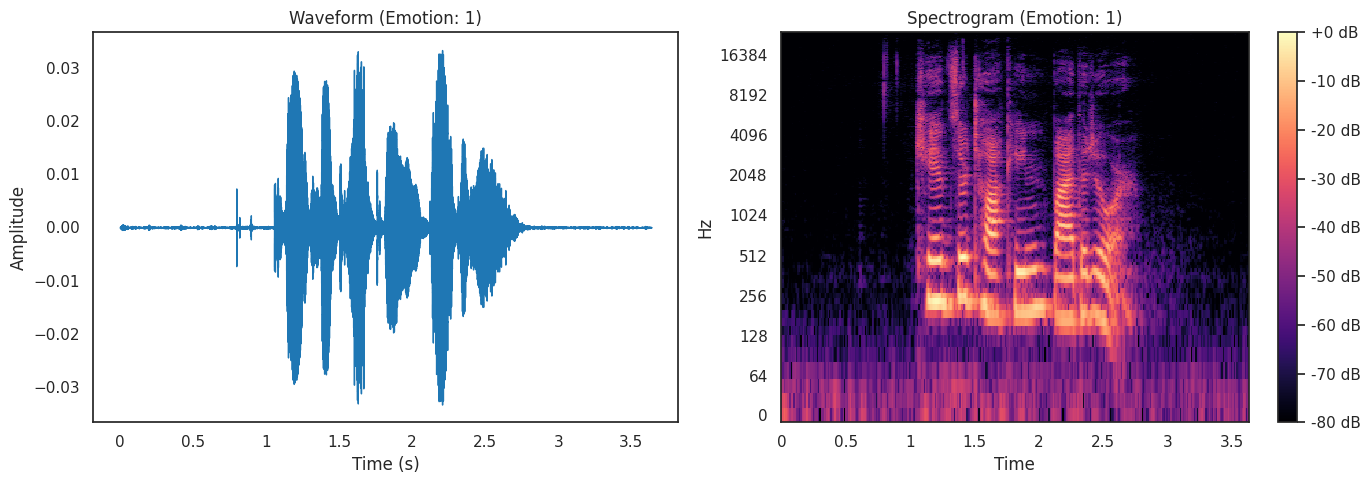

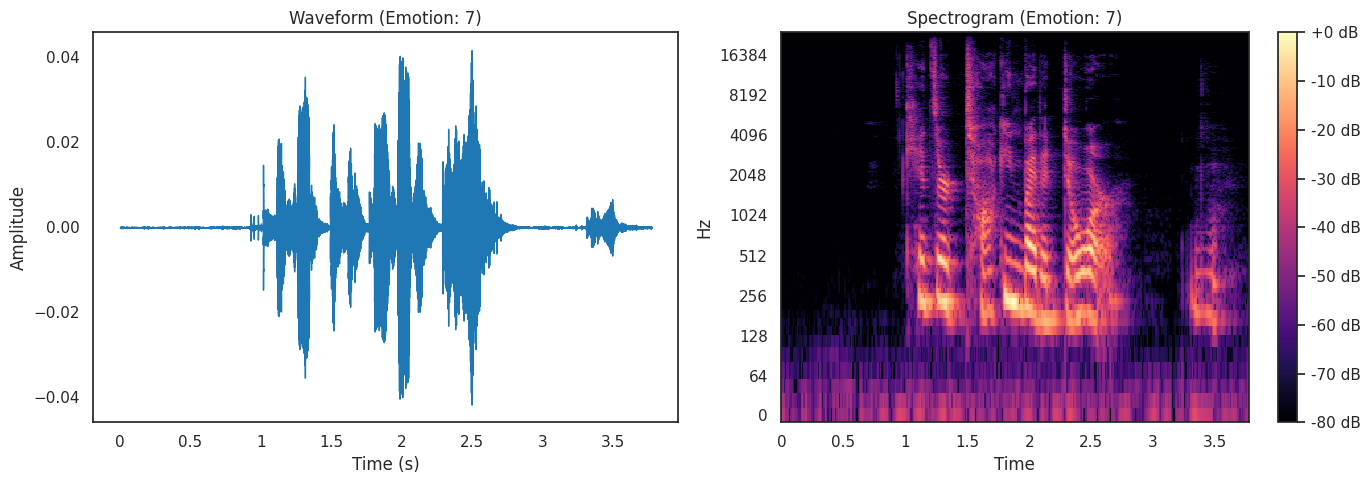

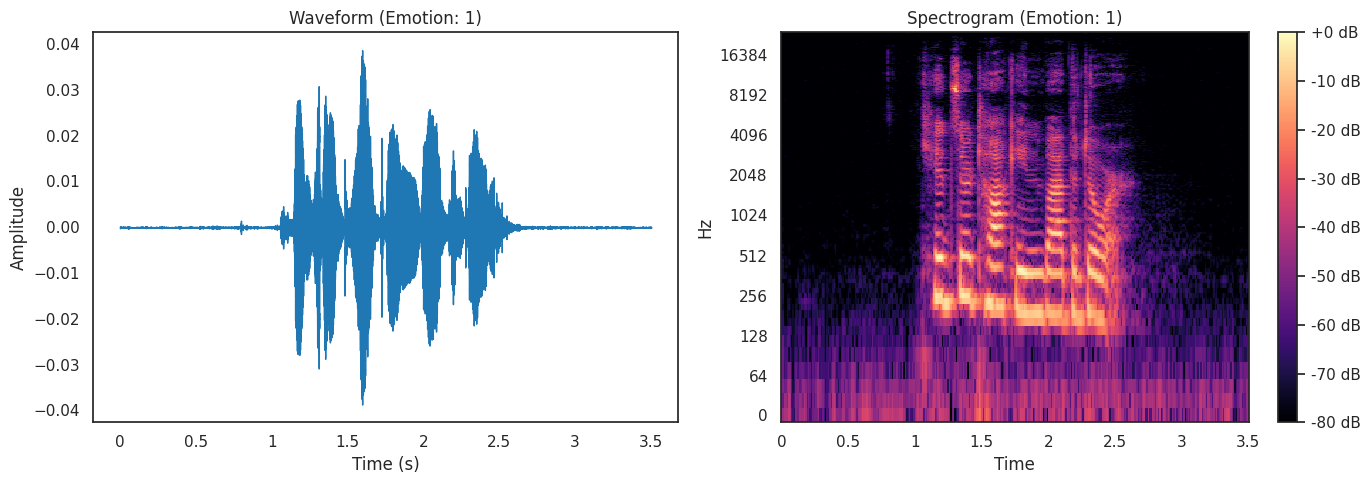

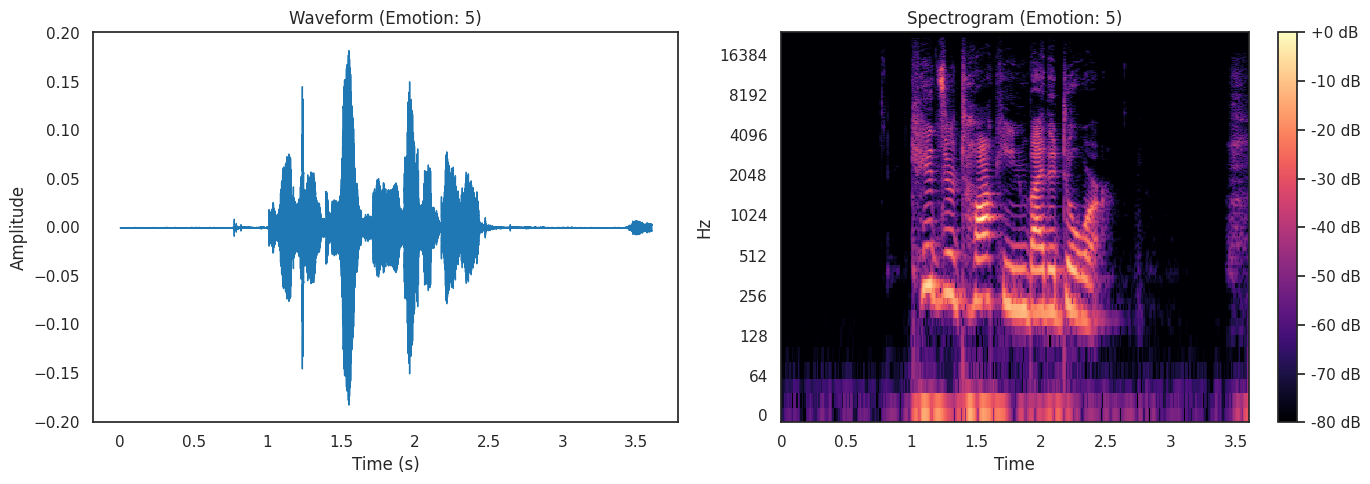

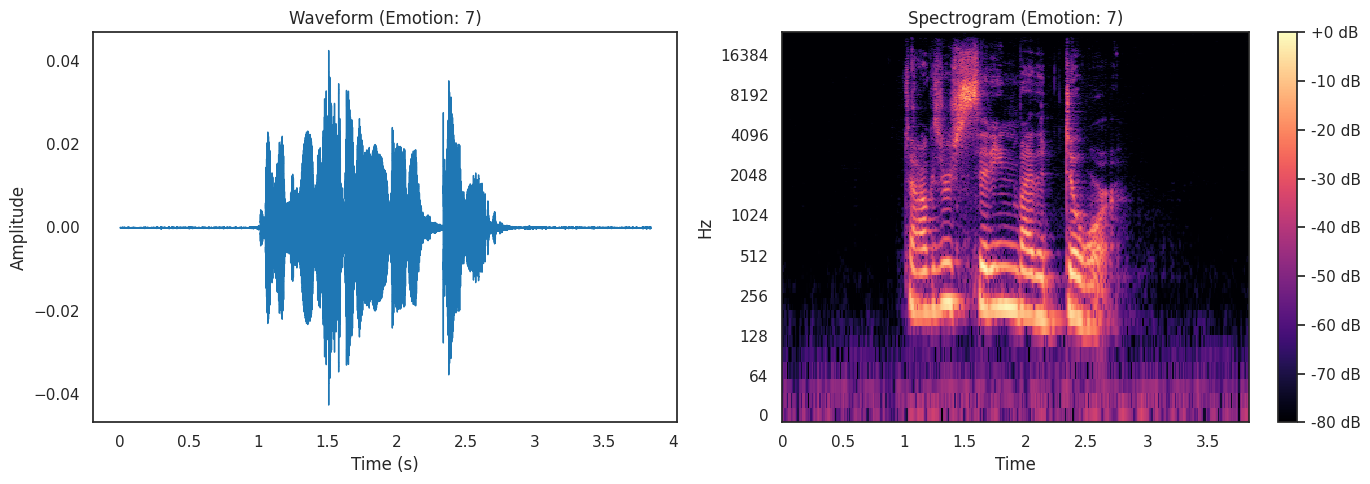

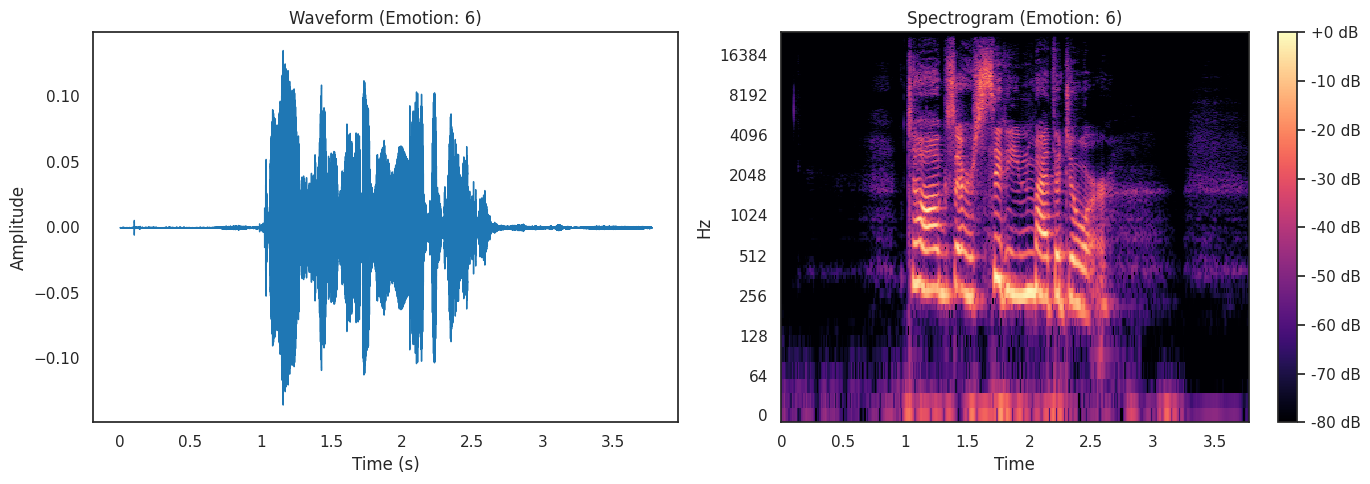

In [ ]:
num_samples = min(6, len(audio_files))

for i in range(num_samples):
    audio_path = audio_files[i]
    emotion, _, _ = extract_metadata(audio_path)
    plot_waveform_and_spectrogram(audio_path, emotion)

In [ ]:
!pip install noisereduce

In [ ]:
import noisereduce as nr

Emotion: 1, Intensity: 1, Actor: 8
Original Audio Shape: (174575,), Sampling Rate: 48000
Resampled Audio Shape: (58192,), New Sampling Rate: 16000


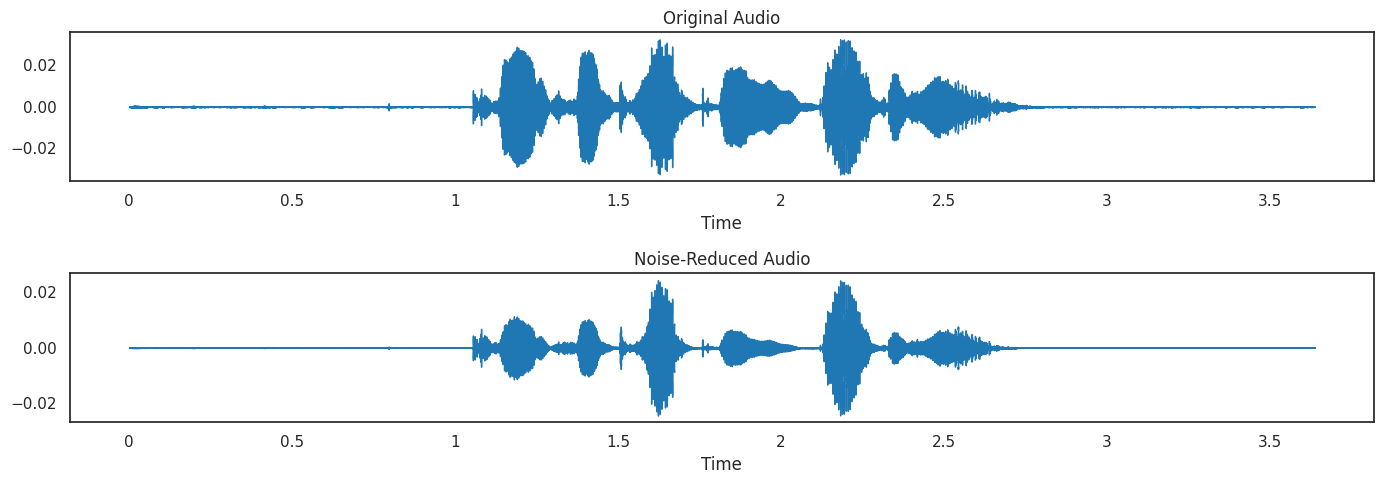

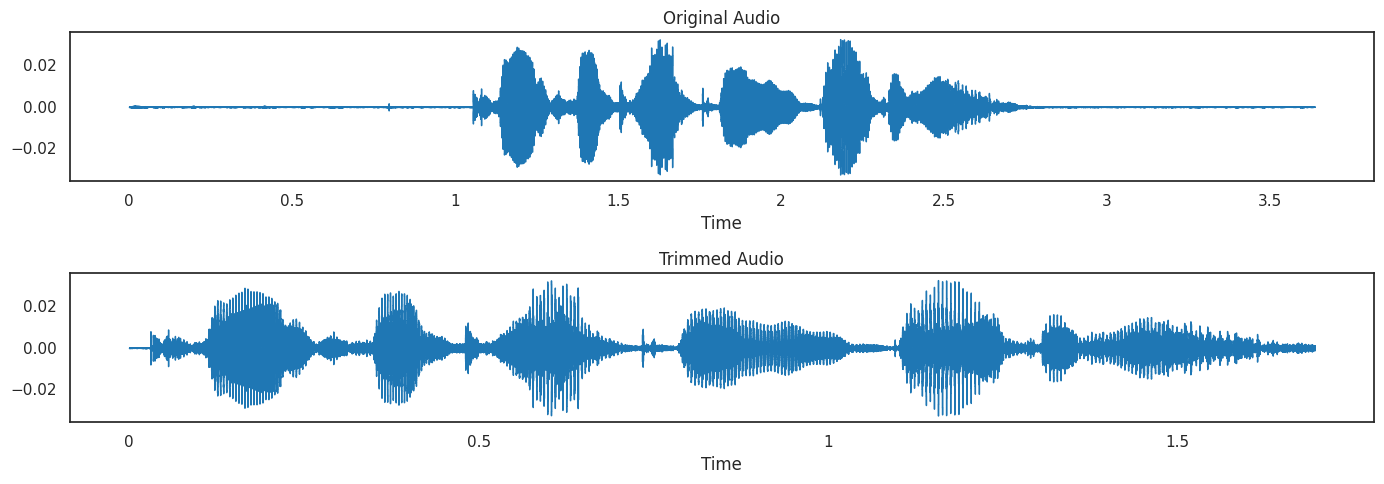

Max amplitude: 1.0, Min amplitude: -0.8860357999801636


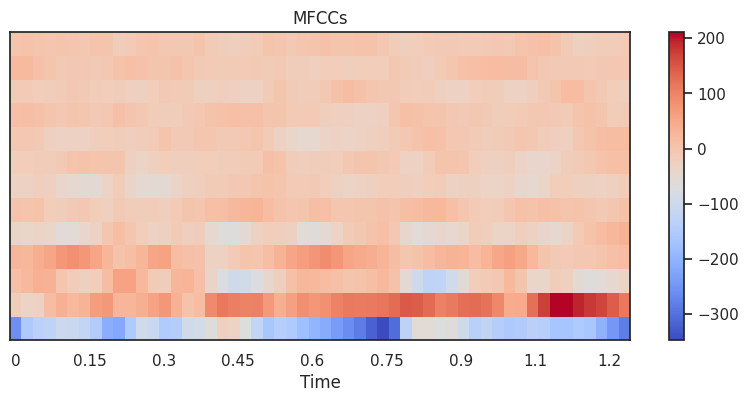

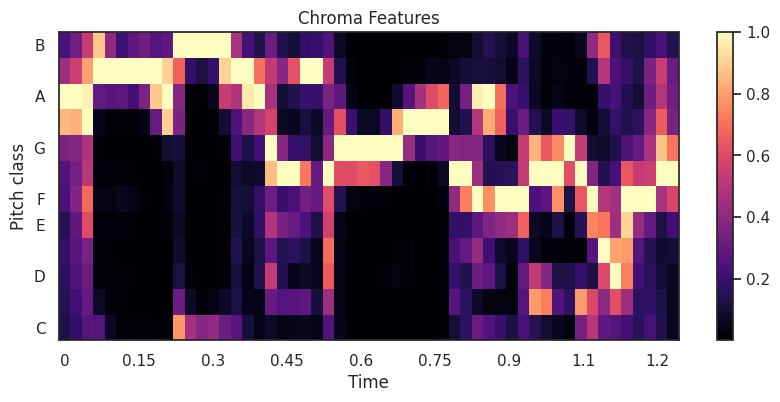

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import noisereduce as nr

# Function to preprocess audio (load, trim, normalize)
def preprocess_audio(audio_path, target_sr=16000):
    # Load audio
    audio, sr = librosa.load(audio_path, sr=target_sr)

    # Trim silence
    trimmed_audio, _ = librosa.effects.trim(audio, top_db=20)

    # Normalize
    normalized_audio = librosa.util.normalize(trimmed_audio)

    return normalized_audio, sr

# Function to extract features
def extract_features(audio, sr):
    # Extract MFCCs
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

    # Extract Chroma Features
    chroma = librosa.feature.chroma_stft(y=audio, sr=sr)

    # Extract Spectral Contrast
    spectral_contrast = librosa.feature.spectral_contrast(y=audio, sr=sr)

    return mfccs, chroma, spectral_contrast

# Select a sample audio file
sample_audio_path = audio_files[0]

# Preprocess the audio
preprocessed_audio, sr = preprocess_audio(sample_audio_path)

# Extract metadata
emotion, intensity, actor = extract_metadata(sample_audio_path)
print(f"Emotion: {emotion}, Intensity: {intensity}, Actor: {actor}")

# Extract features
mfccs, chroma, spectral_contrast = extract_features(preprocessed_audio, sr)

# Load original audio for comparison
original_audio, orig_sr = librosa.load(sample_audio_path, sr=None)
print(f"Original Audio Shape: {original_audio.shape}, Sampling Rate: {orig_sr}")

# Resample audio
resampled_audio, new_sr = librosa.load(sample_audio_path, sr=16000)
print(f"Resampled Audio Shape: {resampled_audio.shape}, New Sampling Rate: {new_sr}")

# Noise Reduction
reduced_noise = nr.reduce_noise(y=resampled_audio, sr=new_sr)

# Plot Original vs Noise-Reduced Audio
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(resampled_audio, sr=new_sr)
plt.title("Original Audio")
plt.subplot(2, 1, 2)
librosa.display.waveshow(reduced_noise, sr=new_sr)
plt.title("Noise-Reduced Audio")
plt.tight_layout()
plt.show()

# Trim Silence from Audio
trimmed_audio, _ = librosa.effects.trim(resampled_audio, top_db=20)

# Plot Original vs Trimmed Audio
plt.figure(figsize=(14, 5))
plt.subplot(2, 1, 1)
librosa.display.waveshow(resampled_audio, sr=new_sr)
plt.title("Original Audio")
plt.subplot(2, 1, 2)
librosa.display.waveshow(trimmed_audio, sr=new_sr)
plt.title("Trimmed Audio")
plt.tight_layout()
plt.show()

# Normalize Trimmed Audio
normalized_audio = librosa.util.normalize(trimmed_audio)
print(f"Max amplitude: {np.max(normalized_audio)}, Min amplitude: {np.min(normalized_audio)}")

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title("MFCCs")
plt.show()

# Plot Chroma Features
plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma')
plt.colorbar()
plt.title("Chroma Features")
plt.show()


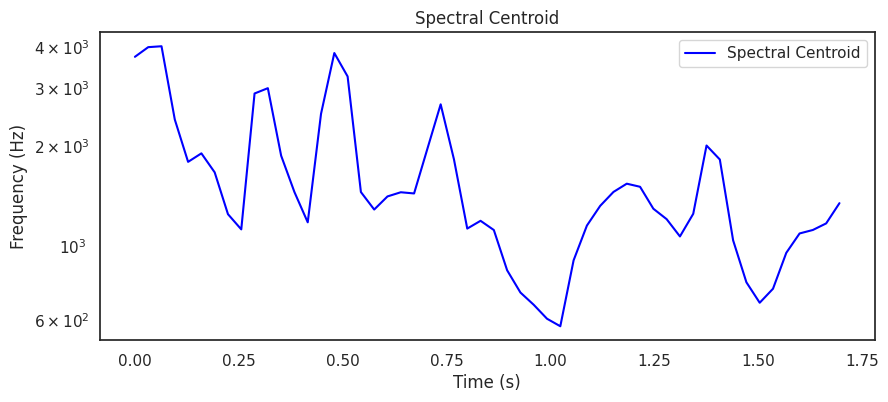

In [ ]:
# Extract Spectral Centroid
spectral_centroid = librosa.feature.spectral_centroid(y=normalized_audio, sr=sr)

# Compute time axis for plotting
frames = range(spectral_centroid.shape[1])
time = librosa.frames_to_time(frames, sr=sr)

# Plot Spectral Centroid
plt.figure(figsize=(10, 4))
plt.semilogy(time, spectral_centroid.T, label="Spectral Centroid", color='b')
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectral Centroid")
plt.legend()
plt.show()


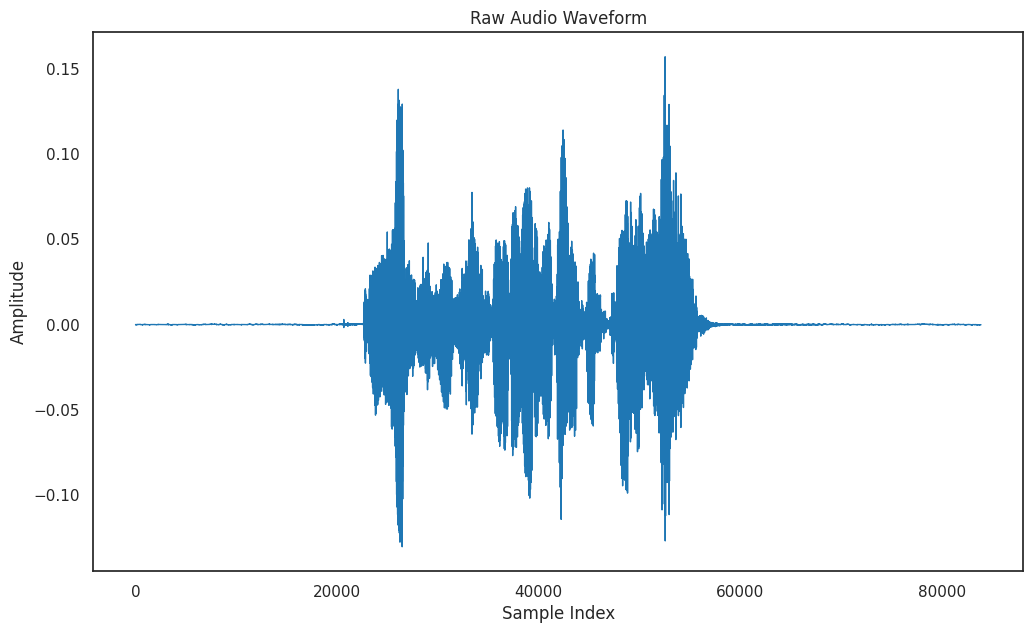

In [ ]:
pd.Series(y).plot(
    figsize=(12, 7),             # Set the figure size for better visibility
    lw=1,                       # Line width for the waveform
    title="Raw Audio Waveform", # Title of the plot
    color=color_pal[0],         # Set the color using the predefined palette
    xlabel="Sample Index",      # Label for the x-axis
    ylabel="Amplitude"          # Label for the y-axis
)

# Display the plot
plt.show()

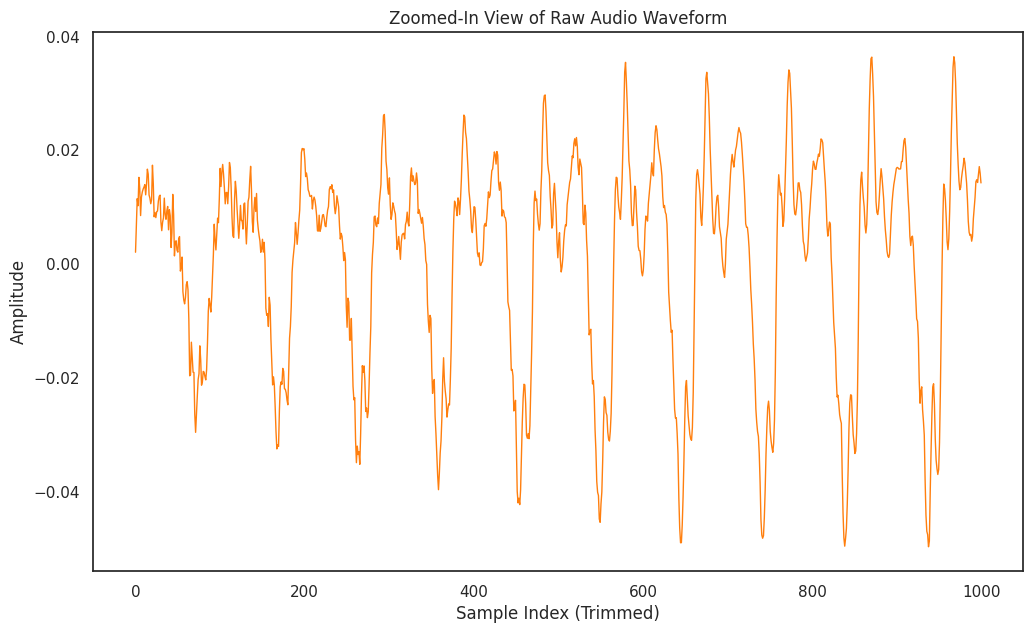

In [ ]:
# Plot a trimmed section of the raw audio waveform
pd.Series(y[30000:31000]).plot(
    figsize=(12, 7),               # Set figure size for better visibility
    lw=1,                         # Line width for the waveform
    title="Zoomed-In View of Raw Audio Waveform",  # Descriptive title for clarity
    color=color_pal[1],           # Use a consistent color palette for aesthetics
    xlabel="Sample Index (Trimmed)", # X-axis label indicating the zoomed-in range
    ylabel="Amplitude"            # Y-axis label for amplitude values
)

# Display the plot
plt.show()

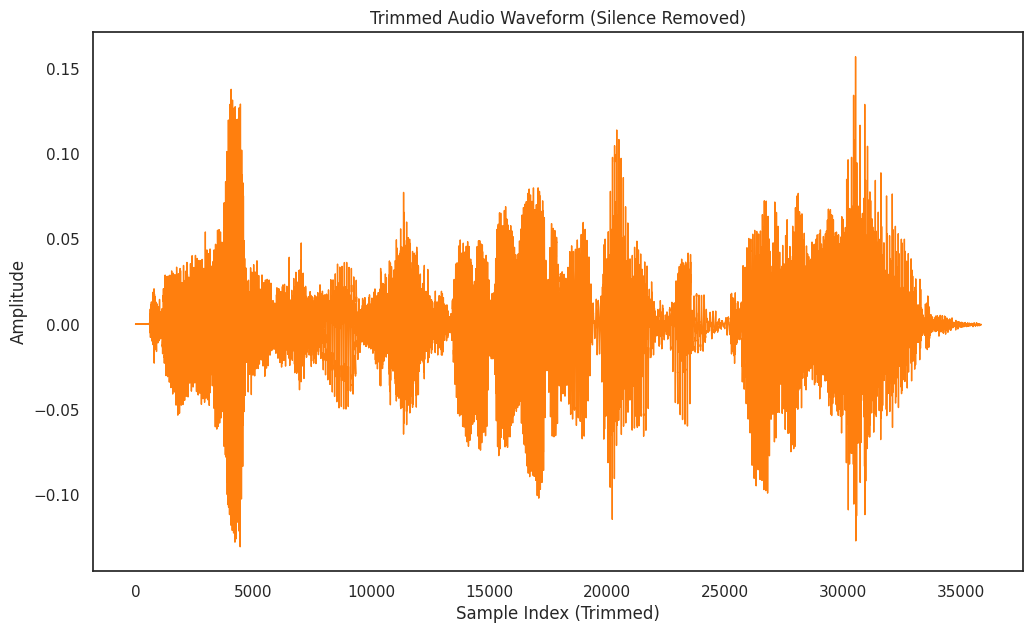

In [ ]:
# Trim the audio signal to remove silence
# `y_trim`: Audio data after silence trimming
# `top_db`: Threshold in decibels for considering a region as silence
y_trim, _ = librosa.effects.trim(y, top_db=35)

# Plot the trimmed audio waveform
pd.Series(y_trim).plot(
    figsize=(12, 7),                # Set figure size for clear visualization
    lw=1,                          # Line width for the waveform
    title="Trimmed Audio Waveform (Silence Removed)",  # Descriptive title
    color=color_pal[1],            # Use a specific color from the palette
    xlabel="Sample Index (Trimmed)", # Label the x-axis for context
    ylabel="Amplitude"             # Label the y-axis to indicate amplitude values
)

# Show the plot
plt.show()

In [ ]:
# Compute the Short-Time Fourier Transform (STFT) of the audio signal
D = librosa.stft(y)  # D is the complex-valued STFT matrix

# Convert the STFT magnitudes to decibels (log scale)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

print(f"Spectrogram Shape: {S_db.shape}")

Spectrogram Shape: (1025, 164)


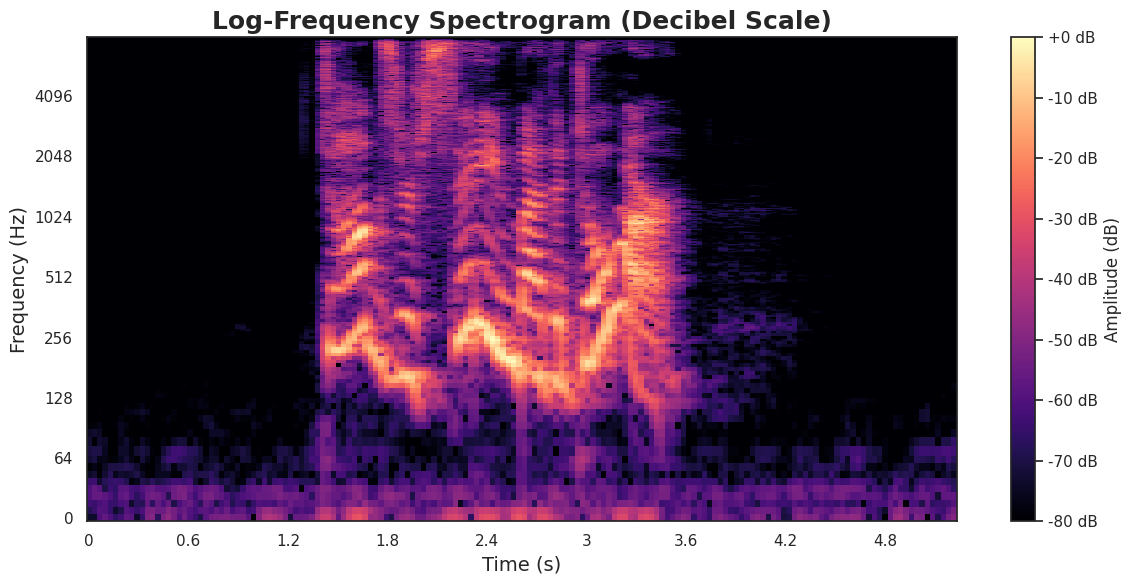

In [ ]:
# Plot the Log-Frequency Spectrogram
fig, ax = plt.subplots(figsize=(12, 6))  # Larger figure for better visibility

# Display the spectrogram with log-scaled frequency axis
img = librosa.display.specshow(
    S_db,                 # Spectrogram data (in decibels)
    x_axis='time',        # X-axis: Time in seconds
    y_axis='log',         # Y-axis: Logarithmic frequency scale
    sr=sr,                # Sample rate (ensures correct time and frequency scaling)
    cmap='magma',         # Colormap for improved aesthetics
    ax=ax                 # Subplot to plot on
)

# Add descriptive title and labels
ax.set_title("Log-Frequency Spectrogram (Decibel Scale)", fontsize=18, fontweight='bold')
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Frequency (Hz)", fontsize=14)

# Add a color bar to indicate decibel levels
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
# Generate the Mel Spectrogram
# y: Audio time series
# sr: Sampling rate of the audio
# n_mels: Number of Mel bands to generate (default is 128, here set to 256 for higher resolution)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)

# Display the shape of the Mel Spectrogram
print(f"Mel Spectrogram Shape: {S.shape}")

Mel Spectrogram Shape: (256, 164)


In [ ]:
# Convert the Mel Spectrogram to Decibels (Logarithmic Scale)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

# Display Information
print(f"Mel Spectrogram (in dB) Shape: {S_db_mel.shape}")
print(f"Decibel Range: {S_db_mel.min():.2f} dB to {S_db_mel.max():.2f} dB")

Mel Spectrogram (in dB) Shape: (256, 164)
Decibel Range: -80.00 dB to 0.00 dB


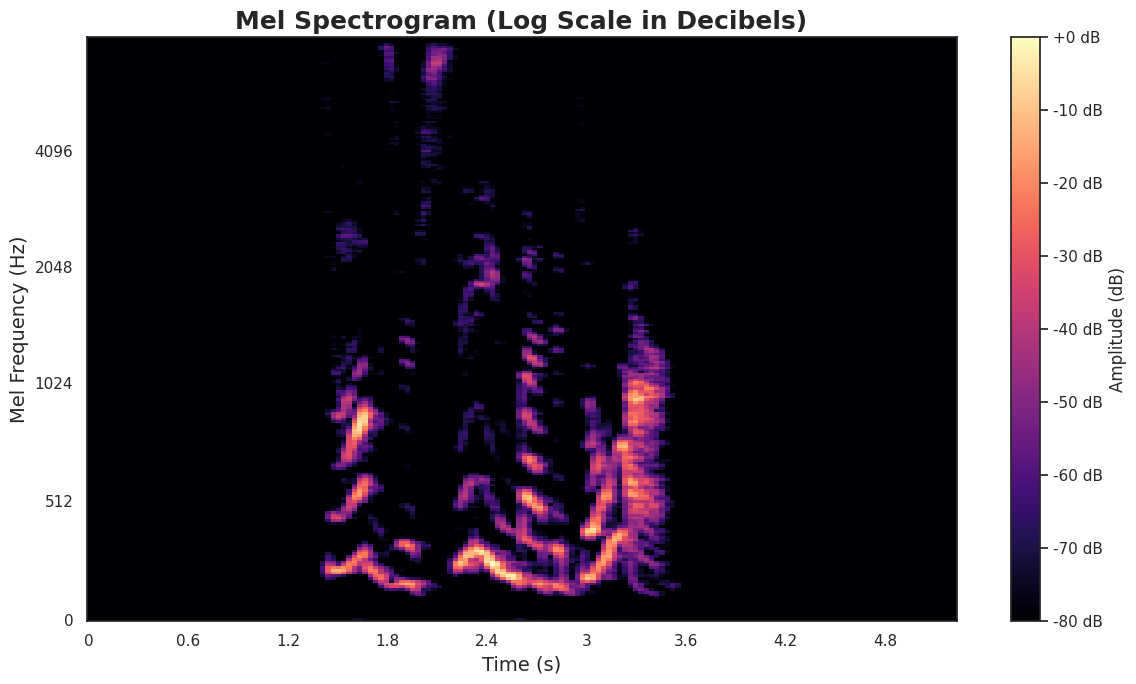

In [ ]:
# Plot the Log-Scaled Mel Spectrogram
fig, ax = plt.subplots(figsize=(12, 7))  # Increase figure size for better clarity

# Display the Mel Spectrogram in Decibels
img = librosa.display.specshow(
    S_db_mel,               # Spectrogram data (in dB scale)
    sr=sr,                  # Sampling rate for accurate time display
    x_axis='time',          # X-axis: Time (seconds)
    y_axis='mel',           # Y-axis: Mel-frequency scale
    cmap='magma',           # Use a perceptually uniform colormap
    ax=ax                   # Plot on the specified subplot
)

# Add Title and Axis Labels
ax.set_title("Mel Spectrogram (Log Scale in Decibels)", fontsize=18, fontweight="bold")
ax.set_xlabel("Time (s)", fontsize=14)
ax.set_ylabel("Mel Frequency (Hz)", fontsize=14)

# Add a Color Bar to Show the Decibel Range
cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label("Amplitude (dB)", fontsize=12)

# Adjust Layout for Better Visualization
plt.tight_layout()
plt.show()

✅ **Loaded and explored the dataset** <br>
✅ **Removed silence using librosa.effects.trim()** <br>
✅ **Generated and visualized spectrograms & Mel spectrograms**

**Step 1: Extract Audio Features (MFCCs, Chroma, Spectral Contrast, etc.)**

**computed MFCCs and Spectrograms, extracting more features and store them in a DataFrame.**

In [ ]:
def extract_features(y, sr):
    """Extracts MFCCs, Chroma, Spectral Contrast, Zero-Crossing Rate, and RMS Energy."""

    # Compute MFCCs
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13), axis=1)

    # Compute Chroma Feature
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)

    # Compute Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)

    # Compute Zero-Crossing Rate
    zero_crossing = np.mean(librosa.feature.zero_crossing_rate(y))

    # Compute Root Mean Square (RMS) Energy
    rms_energy = np.mean(librosa.feature.rms(y=y))

    # Combine all features into a single array
    return np.hstack((mfccs, chroma, spectral_contrast, zero_crossing, rms_energy))

# Extract features from all audio files
data = []
labels = []

for file in audio_file:  # Iterate through all .wav files
    y, sr = librosa.load(file, sr=None)
    y_trim, _ = librosa.effects.trim(y, top_db=35)  # Remove silence
    features = extract_features(y_trim, sr)  # Extract features

    emotion_label = int(file.split("-")[2])  # Extract emotion label from filename
    data.append(features)
    labels.append(emotion_label)

# Convert to DataFrame
feature_columns = [f"MFCC_{i+1}" for i in range(13)] + \
                  [f"Chroma_{i+1}" for i in range(12)] + \
                  [f"Spectral_{i+1}" for i in range(7)] + ["Zero_Crossing", "RMS_Energy"]

df = pd.DataFrame(data, columns=feature_columns)
df["Emotion"] = labels

# Save features
df.to_csv("speech_emotion_features.csv", index=False)
print("Feature extraction complete! Data saved as 'speech_emotion_features.csv'")


Feature extraction complete! Data saved as 'speech_emotion_features.csv'


**Train Machine Learning Models (SVM, Random Forest, k-NN, etc.)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("speech_emotion_features.csv")

# Separate features and labels
X = df.drop(columns=["Emotion"])  # Features
y = df["Emotion"]  # Labels

# Normalize the feature values for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 1152, Testing Samples: 288


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train SVM Model
svm_model = SVC(kernel="rbf", C=10, gamma="scale")
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Train k-NN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)


In [ ]:
# Function to print accuracy & classification report
def evaluate_model(model_name, y_test, y_preds):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_preds))
    print("-" * 60)

# Evaluate all models
evaluate_model("SVM", y_test, svm_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("k-NN", y_test, knn_preds)


Model: SVM
Accuracy: 69.79%
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.37      0.48        19
           2       0.68      0.95      0.79        38
           3       0.76      0.82      0.78        38
           4       0.64      0.47      0.55        38
           5       0.79      0.87      0.83        39
           6       0.56      0.56      0.56        39
           7       0.74      0.74      0.74        38
           8       0.69      0.64      0.67        39

    accuracy                           0.70       288
   macro avg       0.70      0.68      0.68       288
weighted avg       0.70      0.70      0.69       288

------------------------------------------------------------
Model: Random Forest
Accuracy: 62.50%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.26      0.42        19
           2       0.64      0.95      0.77        38
           

In [ ]:
from sklearn.model_selection import GridSearchCV

# SVM Hyperparameter Tuning
svm_params = {"C": [0.1, 1, 10], "gamma": ["scale", "auto"], "kernel": ["rbf", "linear"]}
svm_grid = GridSearchCV(SVC(), svm_params, cv=3, scoring="accuracy", n_jobs=-1)
svm_grid.fit(X_train, y_train)
print("Best SVM Parameters:", svm_grid.best_params_)

# Random Forest Hyperparameter Tuning
rf_params = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring="accuracy", n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("Best RF Parameters:", rf_grid.best_params_)

# k-NN Hyperparameter Tuning
knn_params = {"n_neighbors": [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring="accuracy", n_jobs=-1)
knn_grid.fit(X_train, y_train)
print("Best k-NN Parameters:", knn_grid.best_params_)


Best SVM Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best RF Parameters: {'max_depth': 20, 'n_estimators': 200}
Best k-NN Parameters: {'n_neighbors': 5}


In [ ]:
# Train SVM with best parameters
svm_best = SVC(**svm_grid.best_params_)
svm_best.fit(X_train, y_train)

# Train Random Forest with best parameters
rf_best = RandomForestClassifier(**rf_grid.best_params_, random_state=42)
rf_best.fit(X_train, y_train)

# Train k-NN with best parameters
knn_best = KNeighborsClassifier(**knn_grid.best_params_)
knn_best.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
# Evaluate performance
evaluate_model("Tuned SVM", y_test, svm_best.predict(X_test))
evaluate_model("Tuned RF", y_test, rf_best.predict(X_test))
evaluate_model("Tuned k-NN", y_test, knn_best.predict(X_test))


Model: Tuned SVM
Accuracy: 69.79%
Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.37      0.48        19
           2       0.68      0.95      0.79        38
           3       0.76      0.82      0.78        38
           4       0.64      0.47      0.55        38
           5       0.79      0.87      0.83        39
           6       0.56      0.56      0.56        39
           7       0.74      0.74      0.74        38
           8       0.69      0.64      0.67        39

    accuracy                           0.70       288
   macro avg       0.70      0.68      0.68       288
weighted avg       0.70      0.70      0.69       288

------------------------------------------------------------
Model: Tuned RF
Accuracy: 61.81%
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.26      0.42        19
           2       0.62      0.95      0.75        38
          

In [ ]:
import joblib

# Choose the best model (replace with the best-performing one)
best_model = svm_best  # or rf_best, knn_best

# Save model
joblib.dump(best_model, "speech_emotion_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("Model saved successfully!")


Model saved successfully!


In [ ]:
import numpy as np
print("Number of NaN values in dataset:", np.isnan(X_scaled).sum())


Number of NaN values in dataset: 0


In [ ]:
def extract_features_fixed(y, sr):
    """Extracts features while handling NaN values."""

    # Compute MFCCs & Delta Features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    delta_mfcc = librosa.feature.delta(mfccs)
    delta2_mfcc = librosa.feature.delta(mfccs, order=2)

    mfccs = np.mean(mfccs, axis=1)
    delta_mfcc = np.mean(delta_mfcc, axis=1)
    delta2_mfcc = np.mean(delta2_mfcc, axis=1)

    # Compute Chroma Feature
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr), axis=1)

    # Compute Spectral Contrast
    spectral_contrast = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr), axis=1)

    # Compute Zero-Crossing Rate
    zero_crossing = np.mean(librosa.feature.zero_crossing_rate(y))

    # Compute RMS Energy
    rms_energy = np.mean(librosa.feature.rms(y=y))

    # Compute Pitch (F0) and Voice Probability
    f0, voiced_flag, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))

    # Replace NaN values in f0 with mean pitch (if valid) or 0
    if np.isnan(f0).all():
        pitch_mean = 0  # If no valid pitch values, set to 0
    else:
        pitch_mean = np.nanmean(f0)  # Use mean of valid pitch values

    voiced_prob = np.nanmean(voiced_flag)

    # Combine all features
    return np.hstack((mfccs, delta_mfcc, delta2_mfcc, chroma, spectral_contrast, zero_crossing, rms_energy, pitch_mean, voiced_prob))


In [ ]:
data = []
labels = []

for file in audio_file:
    y, sr = librosa.load(file, sr=None)
    y_trim, _ = librosa.effects.trim(y, top_db=35)
    features = extract_features_fixed(y_trim, sr)  # Use fixed function

    emotion_label = int(file.split("-")[2])
    data.append(features)
    labels.append(emotion_label)

# Convert to DataFrame
df_fixed = pd.DataFrame(data)
df_fixed["Emotion"] = labels

# Save
df_fixed.to_csv("speech_emotion_features_fixed.csv", index=False)
print("Feature extraction (with NaN handling) complete!")


Feature extraction (with NaN handling) complete!


**Ensure No NaNs Before Applying SMOTE
Before resampling, let's remove remaining NaNs just in case.**


In [ ]:
# Load the fixed dataset
df_fixed = pd.read_csv("speech_emotion_features_fixed.csv")

# Replace remaining NaNs with 0 (safe for ML models)
df_fixed.fillna(0, inplace=True)

# Split Features & Labels
X = df_fixed.drop(columns=["Emotion"])
y = df_fixed["Emotion"]

# Standardize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Verify No More NaNs
print("NaN count after preprocessing:", np.isnan(X_scaled).sum())


NaN count after preprocessing: 0
